In [1]:
import pandas as pd

## Importando

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url,sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Trabalhando

In [3]:
print(f'A base tem {dados.shape[0]} registros')

A base tem 32960 registros


In [132]:
dados['Valor por mês'] = dados['Valor'] + dados['Condominio']
dados['Valor por ano'] = dados['Valor por mês'] *12 + dados['IPTU']

In [4]:
df = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor') # mean(numeric_only = True)

<Axes: ylabel='Tipo'>

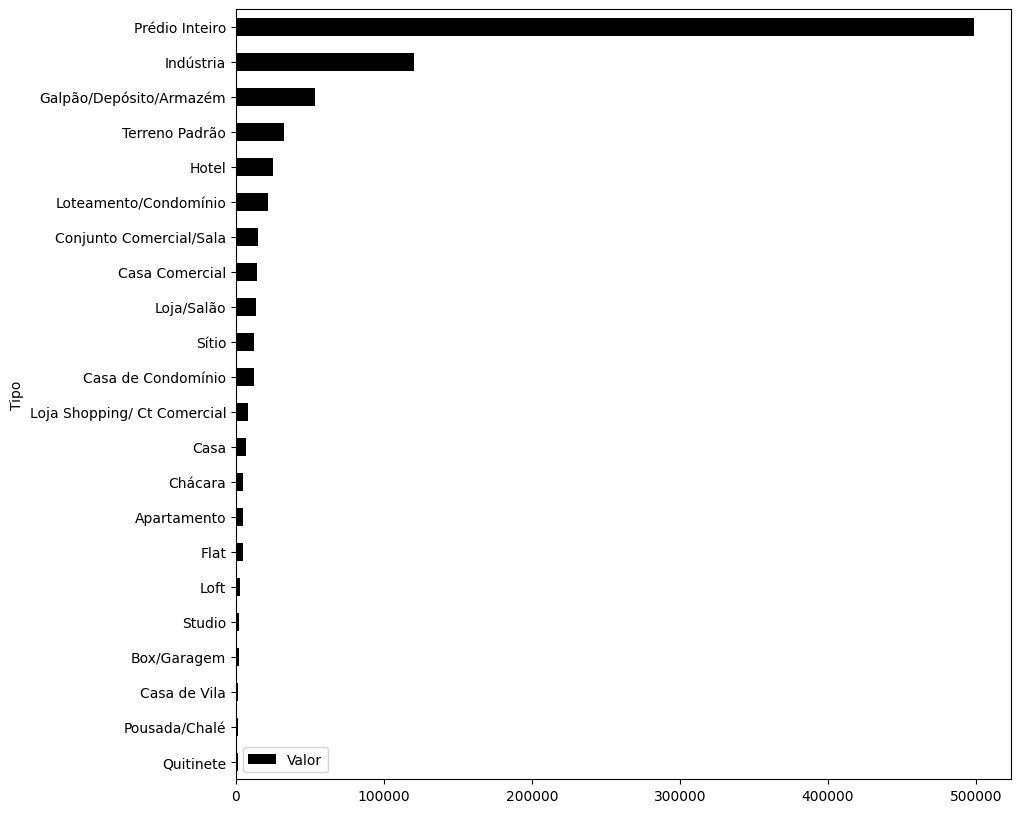

In [5]:
df.plot(kind='barh',figsize = (10,10), color='black')

In [6]:
# unique é tipo único
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [7]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [8]:
#query seleciona linhas com base condição especifica
#sempre coloca @ para: Quando é expressão ('') coloca @ para referenciar a variavel
#Mostra apenas linhas onde na coluna Tipo, tenha apenas componentes da lista imoveis comerciais 
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [20]:
df1 = dados.query('@imoveis_comerciais not in Tipo')
df2 = df1.groupby('Tipo')[['Valor']].mean().sort_values('Valor')


<Axes: ylabel='Tipo'>

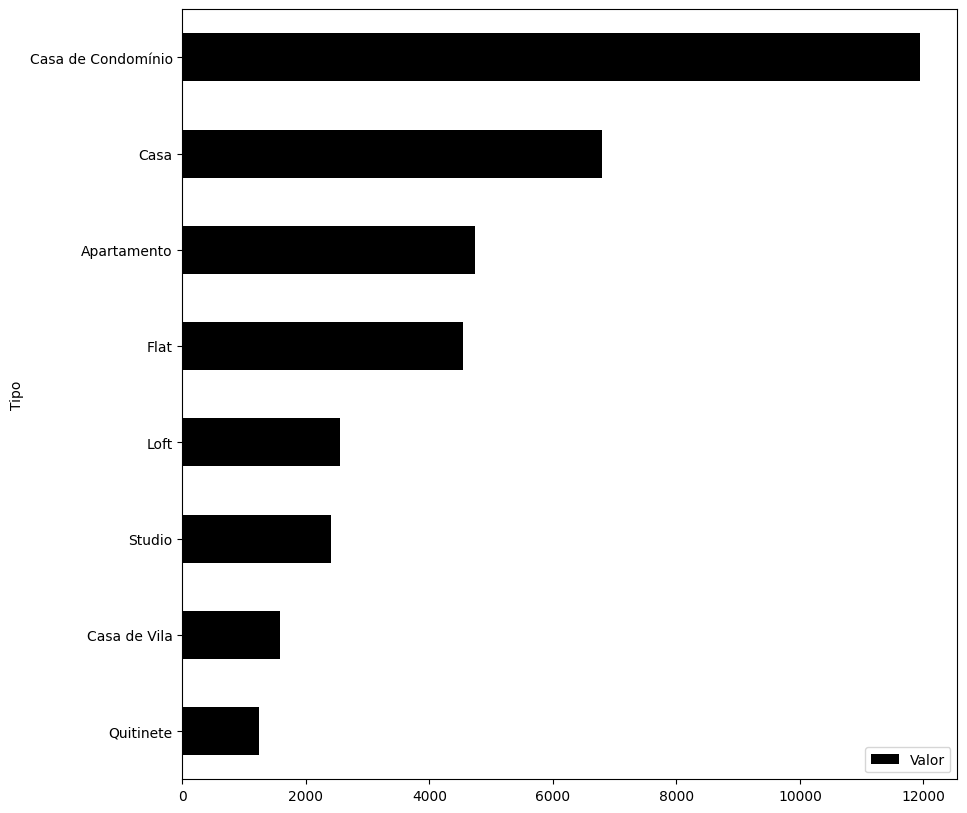

In [21]:
df2.plot(kind='barh',figsize = (10,10), color='black')

## Percenteual tipo de imóveis

In [32]:
#Conta o número de vezes que aparece. Normalize é percentual. To frame transforma series em frame e sort_values, ordena por valor
df_percentual_tipo = df1.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

In [39]:
df_percentual_tipo['Tipo']

Studio                0.000173
Loft                  0.002207
Casa de Vila          0.010774
Flat                  0.020596
Quitinete             0.036173
Casa                  0.041842
Casa de Condomínio    0.043096
Apartamento           0.845139
Name: Tipo, dtype: float64

<Axes: >

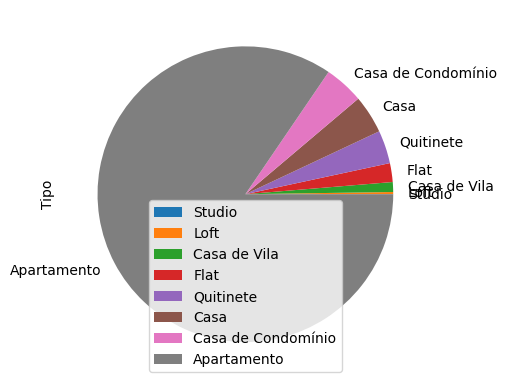

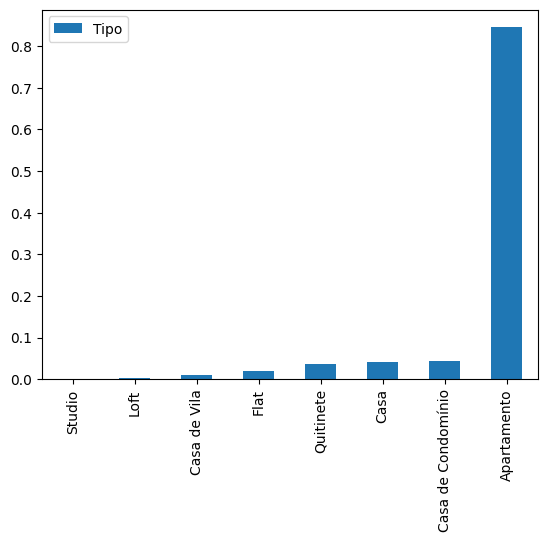

In [49]:
df_percentual_tipo.plot(kind='pie',y='Tipo')
df_percentual_tipo.plot(kind='bar',y='Tipo')

## Bairros mais caros

In [54]:
df_apartamentos = df1.query('Tipo == "Apartamento"')

In [67]:
print(f'Média de quartos por apartamento: {round(df_apartamentos["Quartos"].mean())} quartos')

Média de quartos por apartamento: 2 quartos


In [74]:
print(f'Existem {len(df1.Bairro.unique())} bairros na nossa base.')

Existem 154 bairros na nossa base.


In [ ]:
df1

<Axes: ylabel='Bairro'>

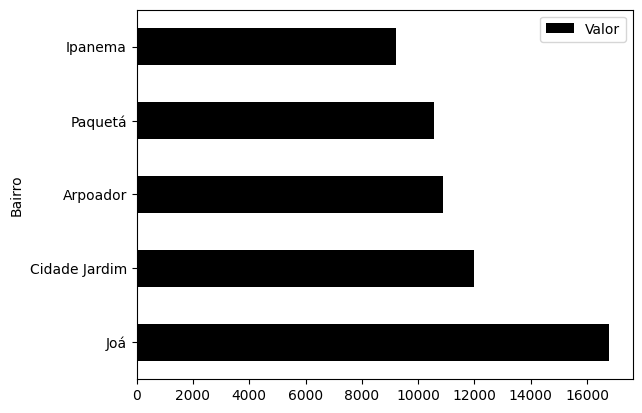

In [92]:
df_bairros = df1.groupby('Bairro')[['Valor']].mean().sort_values('Valor',ascending=False)
df_bairros_mais_caros = df_bairros.head(5)
df_bairros_mais_caros.plot(kind='barh',color='black')

In [101]:
dados.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [100]:
dados = dados.fillna(0)

In [115]:
dados.query('Tipo=="Apartamento" and Quartos==1 and Valor < 1200')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32627,Apartamento,Glória,1,0,0,46,1100.0,453.0,32.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32714,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [117]:
dados.query('Tipo=="Apartamento" and Quartos>=2 and Valor < 3000 and Area > 70')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [158]:
dados['Descrição'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + dados['Quartos'].astype(str) + ' quarto(s) ' + ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'


In [157]:
dados['Tem suite'] = dados['Suites'].apply(lambda x: 'Sim' if x>0 else 'Não')

In [159]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por mês,Valor por ano,Descrição,Tem suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) e...,Não
